# This File is to look at rider behaviour for those picked up from JFK Airport

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the lyft_Dec_23.parquet file into a DataFrame.
lyft_df = pd.read_parquet("lyft_Dec_23.parquet")

# Display the first 5 rows of the DataFrame.
lyft_df.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
17,HV0005,2023-12-01 00:50:08,2023-12-01 01:27:59,256,132,17.227,2271,56.51,0.00,1.62,5.24,0.00,2.5,0.0,44.32,65.87
18,HV0005,2023-12-01 00:09:21,2023-12-01 00:20:38,40,97,1.934,677,11.47,0.00,0.30,0.96,0.00,0.0,3.0,8.98,15.73
19,HV0005,2023-12-01 00:32:32,2023-12-01 00:43:27,148,79,1.313,655,11.35,0.00,0.30,0.98,2.75,0.0,0.0,7.96,15.38
20,HV0005,2023-12-01 00:47:13,2023-12-01 01:06:57,107,256,4.059,1184,20.28,0.35,0.57,1.83,2.75,0.0,0.0,16.60,25.78
27,HV0005,2023-12-01 00:46:08,2023-12-01 00:49:17,129,138,1.436,189,8.24,0.00,0.30,0.95,0.00,2.5,0.0,5.47,11.99


In [4]:
lyft_df.set_index("pickup_datetime", inplace=True, drop=False)  
lyft_df.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,,
2023-12-01 00:50:08,HV0005,2023-12-01 00:50:08,2023-12-01 01:27:59,256,132,17.227,2271,56.51,0.00,1.62,5.24,0.00,2.5,0.0,44.32,65.87
2023-12-01 00:09:21,HV0005,2023-12-01 00:09:21,2023-12-01 00:20:38,40,97,1.934,677,11.47,0.00,0.30,0.96,0.00,0.0,3.0,8.98,15.73
2023-12-01 00:32:32,HV0005,2023-12-01 00:32:32,2023-12-01 00:43:27,148,79,1.313,655,11.35,0.00,0.30,0.98,2.75,0.0,0.0,7.96,15.38
2023-12-01 00:47:13,HV0005,2023-12-01 00:47:13,2023-12-01 01:06:57,107,256,4.059,1184,20.28,0.35,0.57,1.83,2.75,0.0,0.0,16.60,25.78
2023-12-01 00:46:08,HV0005,2023-12-01 00:46:08,2023-12-01 00:49:17,129,138,1.436,189,8.24,0.00,0.30,0.95,0.00,2.5,0.0,5.47,11.99


In [5]:
from Util import merge_with_taxi_data

# Merge the lyft data with the taxi data.
lyft_locations_df = merge_with_taxi_data(lyft_df)
lyft_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:50:08,2023-12-01 01:27:59,256,Brooklyn,Williamsburg (South Side),132,Queens,JFK Airport,17.227,2271,56.51,0.00,1.62,5.24,0.00,2.5,0.0,44.32,65.87
1,2023-12-01 00:09:21,2023-12-01 00:20:38,40,Brooklyn,Carroll Gardens,97,Brooklyn,Fort Greene,1.934,677,11.47,0.00,0.30,0.96,0.00,0.0,3.0,8.98,15.73
2,2023-12-01 00:32:32,2023-12-01 00:43:27,148,Manhattan,Lower East Side,79,Manhattan,East Village,1.313,655,11.35,0.00,0.30,0.98,2.75,0.0,0.0,7.96,15.38
3,2023-12-01 00:47:13,2023-12-01 01:06:57,107,Manhattan,Gramercy,256,Brooklyn,Williamsburg (South Side),4.059,1184,20.28,0.35,0.57,1.83,2.75,0.0,0.0,16.60,25.78
4,2023-12-01 00:46:08,2023-12-01 00:49:17,129,Queens,Jackson Heights,138,Queens,LaGuardia Airport,1.436,189,8.24,0.00,0.30,0.95,0.00,2.5,0.0,5.47,11.99


# Prep Work Complete (from Common_Trends.ipynb) - Now to Analyize JFK

In [6]:
#Filter to just JFK pickups 
jfk_df = lyft_locations_df[(lyft_locations_df['PULocationID'] == 132) & (lyft_locations_df['airport_fee'] > 0 )]

jfk_df.set_index("pickup_datetime", inplace=True, drop=False)  

jfk_df.info()
jfk_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93847 entries, 2023-12-01 00:47:06 to 2023-12-31 23:06:47
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup_datetime       93847 non-null  datetime64[us]
 1   dropoff_datetime      93847 non-null  datetime64[us]
 2   PULocationID          93847 non-null  int32         
 3   Pickup_Borough        93847 non-null  object        
 4   Pickup_Zone           93847 non-null  object        
 5   DOLocationID          93847 non-null  int32         
 6   Dropoff_Borough       78058 non-null  object        
 7   Dropoff_Zone          93847 non-null  object        
 8   trip_miles            93847 non-null  float64       
 9   trip_time             93847 non-null  int64         
 10  base_passenger_fare   93847 non-null  float64       
 11  tolls                 93847 non-null  float64       
 12  bcf                   93847 non-null  f

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,,,,,
2023-12-01 00:47:06,2023-12-01 00:47:06,2023-12-01 01:05:32,132,Queens,JFK Airport,134,Queens,Kew Gardens,6.614,1106,26.76,0.00,0.76,2.45,0.00,2.5,0.0,19.24,32.47
2023-12-01 00:42:28,2023-12-01 00:42:28,2023-12-01 01:12:06,132,Queens,JFK Airport,61,Brooklyn,Crown Heights North,10.402,1778,34.22,0.00,1.01,3.26,0.00,2.5,0.0,30.62,40.99
2023-12-01 00:57:43,2023-12-01 00:57:43,2023-12-01 01:24:53,132,Queens,JFK Airport,263,Manhattan,Yorkville West,18.102,1630,45.44,6.26,1.43,4.61,2.75,2.5,5.0,39.38,67.99
2023-12-01 00:37:01,2023-12-01 00:37:01,2023-12-01 00:42:47,132,Queens,JFK Airport,10,Queens,Baisley Park,1.079,346,7.32,0.00,0.24,0.78,0.00,2.5,0.0,5.47,10.84
2023-12-01 00:12:03,2023-12-01 00:12:03,2023-12-01 00:37:31,132,Queens,JFK Airport,145,Queens,Long Island City/Hunters Point,15.537,1528,44.38,0.00,1.21,3.90,0.00,2.5,10.4,35.02,62.39


Text(0, 0.5, 'Number of Trips')

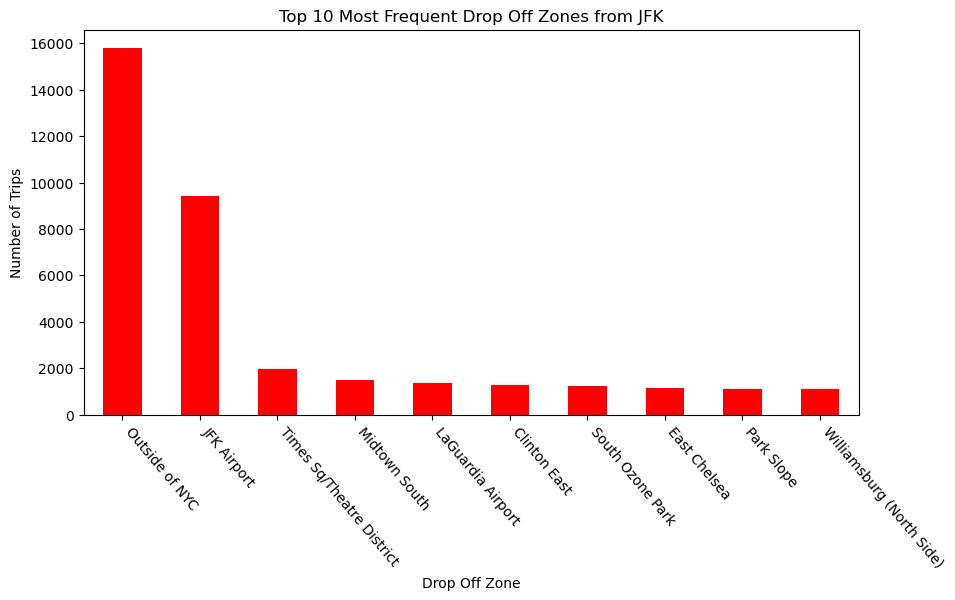

In [7]:
# Plot the top 10 most frequent dropoff zones.
jfk_df["Dropoff_Zone"].value_counts().head(10).plot(kind="bar", title="Top 10 Most Frequent Drop Off Zones from JFK", figsize=(10, 5), color='red')
plt.xticks(rotation=310, ha="left")
plt.xlabel("Drop Off Zone")
plt.ylabel("Number of Trips")

Text(0, 0.5, 'Number of Trips')

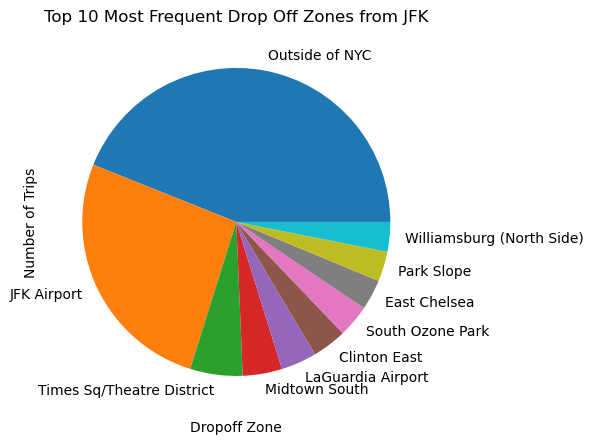

In [8]:
jfk_df["Dropoff_Zone"].value_counts().head(10).plot(kind="pie", title="Top 10 Most Frequent Drop Off Zones from JFK", figsize=(10, 5))
plt.xticks(rotation=310, ha="left")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")

In [10]:
jfk_scatter = jfk_df.copy()
jfk_scatter['trip_time'] = jfk_scatter['trip_time'] / 60
 

Text(0, 0.5, 'Miles')

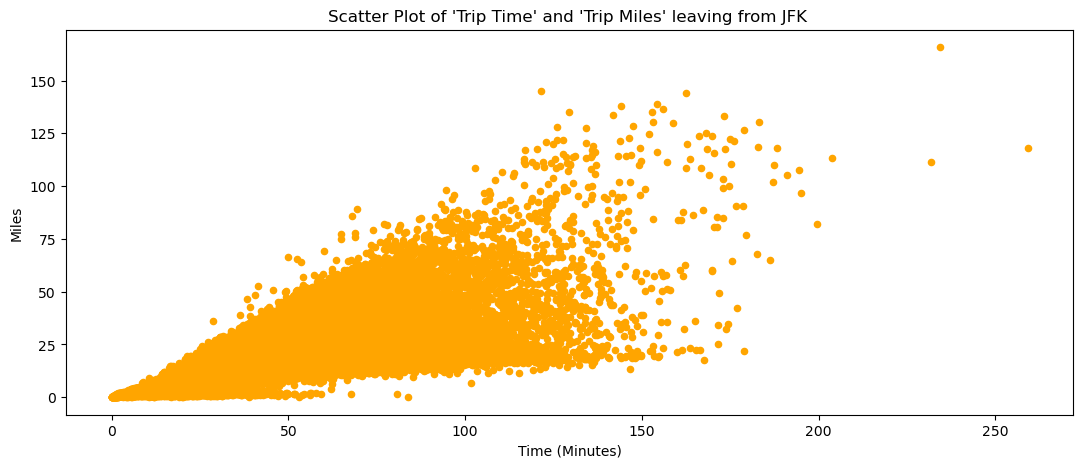

In [12]:
# scatter plot for trip time and trip miles

jfk_scatter.plot.scatter(x="trip_time", y="trip_miles", figsize=(13, 5), color="orange") 
plt.title("Scatter Plot of 'Trip Time' and 'Trip Miles' leaving from JFK ")
plt.xlabel("Time (Minutes)")
plt.ylabel("Miles")

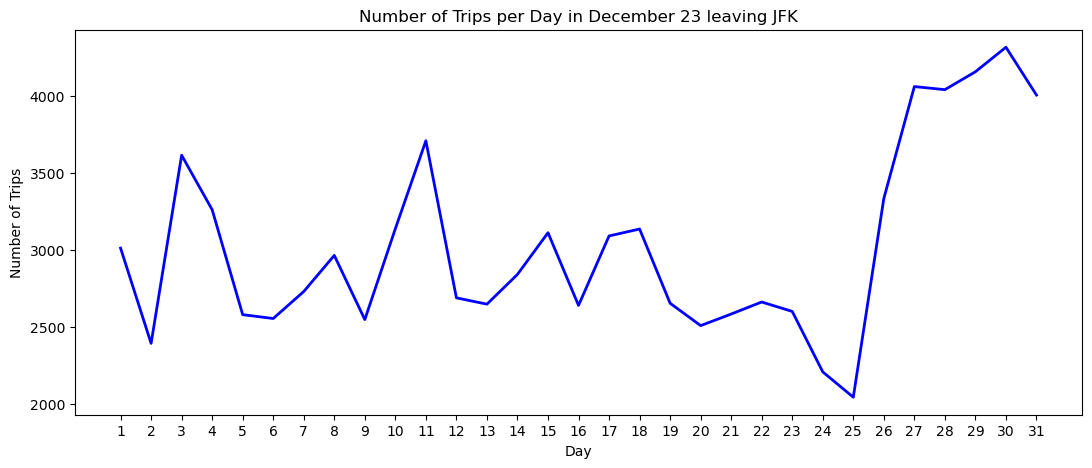

In [10]:
jfk_df["DOLocationID"].groupby(jfk_df.index.day).count().plot(figsize=(13, 5), color="blue", linewidth=2)
plt.title("Number of Trips per Day in December 23 leaving JFK")
plt.xlabel("Day")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Number of Trips")
plt.show()

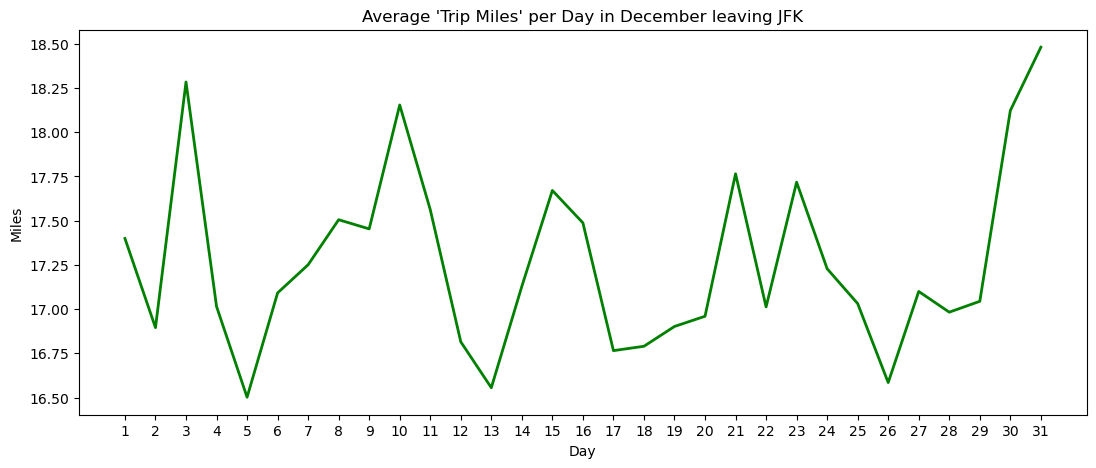

In [11]:
jfk_df.groupby(jfk_df.index.day)["trip_miles"].mean().plot(figsize=(13, 5), color="green", linewidth=2)
plt.title("Average 'Trip Miles' per Day in December leaving JFK")
plt.xlabel("Day")
plt.ylabel("Miles")
plt.xticks(np.arange(1, 32, 1))
plt.show()

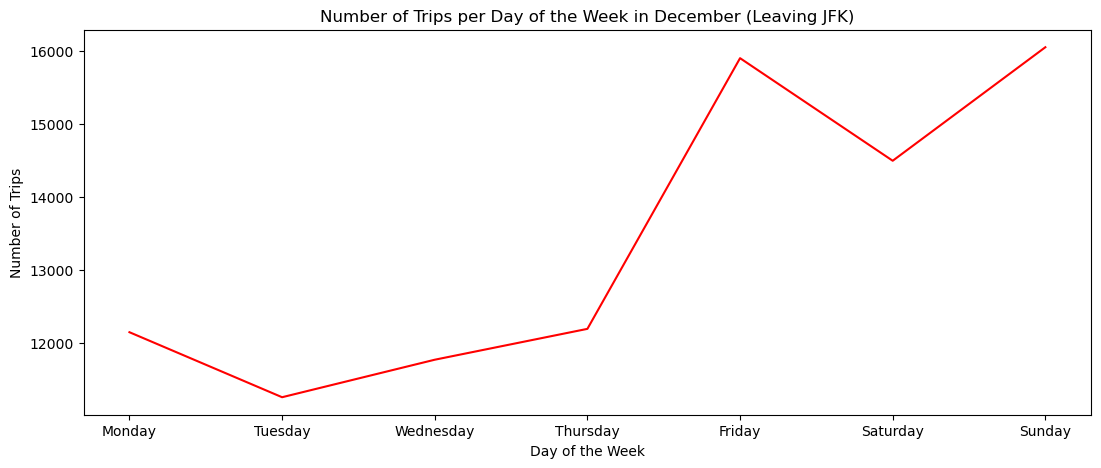

In [12]:
jfk_df.groupby(jfk_df.index.dayofweek)["trip_time"].count().plot(figsize=(13, 5), color="red")
plt.title("Number of Trips per Day of the Week in December (Leaving JFK)")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

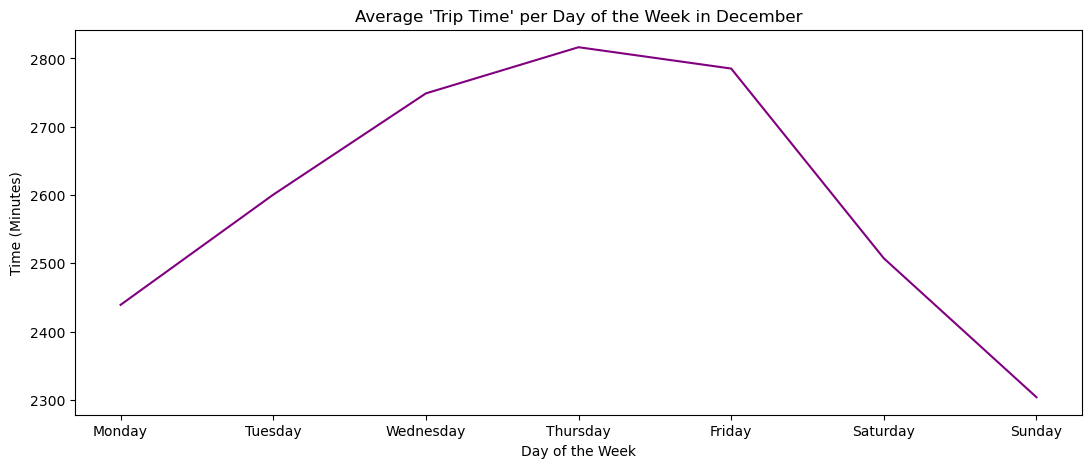

In [13]:
jfk_df.groupby(jfk_df.index.dayofweek)["trip_time"].mean().plot(figsize=(13, 5), color="purple")
plt.title("Average 'Trip Time' per Day of the Week in December")
plt.xlabel("Day of the Week")
plt.ylabel("Time (Minutes)")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

In [21]:
# Read the taxi_zone_lookup.csv file into a DataFrame.
Taxi_Zone_Lookup_df = pd.read_csv("Resources/taxi_zone_lookup.csv")

# Display the first 10 rows of the DataFrame.
Taxi_Zone_Lookup_df.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [22]:
# merge the two dataframes based on pickup locations
full_jfk_locations_df = pd.merge(jfk_df, Taxi_Zone_Lookup_df, left_on="PULocationID", right_on="LocationID")
full_jfk_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,LocationID,Borough,Zone,service_zone
0,2023-12-01 00:47:06,2023-12-01 01:05:32,132,Queens,JFK Airport,134,Queens,Kew Gardens,6.614,1106,...,2.45,0.00,2.5,0.0,19.24,32.47,132,Queens,JFK Airport,Airports
1,2023-12-01 00:42:28,2023-12-01 01:12:06,132,Queens,JFK Airport,61,Brooklyn,Crown Heights North,10.402,1778,...,3.26,0.00,2.5,0.0,30.62,40.99,132,Queens,JFK Airport,Airports
2,2023-12-01 00:57:43,2023-12-01 01:24:53,132,Queens,JFK Airport,263,Manhattan,Yorkville West,18.102,1630,...,4.61,2.75,2.5,5.0,39.38,67.99,132,Queens,JFK Airport,Airports
3,2023-12-01 00:37:01,2023-12-01 00:42:47,132,Queens,JFK Airport,10,Queens,Baisley Park,1.079,346,...,0.78,0.00,2.5,0.0,5.47,10.84,132,Queens,JFK Airport,Airports
4,2023-12-01 00:12:03,2023-12-01 00:37:31,132,Queens,JFK Airport,145,Queens,Long Island City/Hunters Point,15.537,1528,...,3.90,0.00,2.5,10.4,35.02,62.39,132,Queens,JFK Airport,Airports


In [27]:
# Rename the columns to match the schema

full_jfk_locations_df.rename(columns={"Borough": "Pickup_Borough", "Zone": "Pickup_Zone"}, inplace=True)


In [24]:
# Drop the LocationID and service_zone columns

full_jfk_locations_df = full_jfk_locations_df.drop(columns=["LocationID", "service_zone"])


In [25]:
# Reorder the columns
full_jfk_locations_df = full_jfk_locations_df[["pickup_datetime", "dropoff_datetime", "PULocationID", "Pickup_Borough", "Pickup_Zone", "DOLocationID", "trip_miles", "trip_time", "base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "Total_Passenger_Cost"]]


In [26]:
# Display the first 5 rows of the DataFrame.

full_jfk_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Borough,Pickup_Zone,Pickup_Zone,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:47:06,2023-12-01 01:05:32,132,Queens,Queens,JFK Airport,JFK Airport,134,6.614,1106,26.76,0.00,0.76,2.45,0.00,2.5,0.0,19.24,32.47
1,2023-12-01 00:42:28,2023-12-01 01:12:06,132,Queens,Queens,JFK Airport,JFK Airport,61,10.402,1778,34.22,0.00,1.01,3.26,0.00,2.5,0.0,30.62,40.99
2,2023-12-01 00:57:43,2023-12-01 01:24:53,132,Queens,Queens,JFK Airport,JFK Airport,263,18.102,1630,45.44,6.26,1.43,4.61,2.75,2.5,5.0,39.38,67.99
3,2023-12-01 00:37:01,2023-12-01 00:42:47,132,Queens,Queens,JFK Airport,JFK Airport,10,1.079,346,7.32,0.00,0.24,0.78,0.00,2.5,0.0,5.47,10.84
4,2023-12-01 00:12:03,2023-12-01 00:37:31,132,Queens,Queens,JFK Airport,JFK Airport,145,15.537,1528,44.38,0.00,1.21,3.90,0.00,2.5,10.4,35.02,62.39


In [28]:
# merge  lyft_PU_locations_df with Taxi_Zone_Lookup_df based on drop-off locations
full_jfk_locations_df = pd.merge(full_jfk_locations_df, Taxi_Zone_Lookup_df, left_on="DOLocationID", right_on="LocationID")
full_jfk_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Borough,Pickup_Zone,Pickup_Zone,DOLocationID,trip_miles,trip_time,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,LocationID,Borough,Zone,service_zone
0,2023-12-01 00:47:06,2023-12-01 01:05:32,132,Queens,Queens,JFK Airport,JFK Airport,134,6.614,1106,...,2.45,0.00,2.5,0.0,19.24,32.47,134,Queens,Kew Gardens,Boro Zone
1,2023-12-01 00:42:28,2023-12-01 01:12:06,132,Queens,Queens,JFK Airport,JFK Airport,61,10.402,1778,...,3.26,0.00,2.5,0.0,30.62,40.99,61,Brooklyn,Crown Heights North,Boro Zone
2,2023-12-01 00:57:43,2023-12-01 01:24:53,132,Queens,Queens,JFK Airport,JFK Airport,263,18.102,1630,...,4.61,2.75,2.5,5.0,39.38,67.99,263,Manhattan,Yorkville West,Yellow Zone
3,2023-12-01 00:37:01,2023-12-01 00:42:47,132,Queens,Queens,JFK Airport,JFK Airport,10,1.079,346,...,0.78,0.00,2.5,0.0,5.47,10.84,10,Queens,Baisley Park,Boro Zone
4,2023-12-01 00:12:03,2023-12-01 00:37:31,132,Queens,Queens,JFK Airport,JFK Airport,145,15.537,1528,...,3.90,0.00,2.5,10.4,35.02,62.39,145,Queens,Long Island City/Hunters Point,Boro Zone


In [32]:
# Rename the columns to match the schema
full_jfk_locations_df.rename(columns={"Borough": "Dropoff_Borough", "Zone": "Dropoff_Zone"}, inplace=True)

# Drop the LocationID and service_zone columns
full_jfk_locations_df = full_jfk_locations_df.drop(columns=["LocationID", "service_zone"])

# Reorder the columns
full_jfk_locations_df = full_jfk_locations_df[["pickup_datetime", "dropoff_datetime", "PULocationID", "Pickup_Borough", "Pickup_Zone", "DOLocationID", "Dropoff_Borough", "Dropoff_Zone", "trip_miles", "trip_time", "base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "Total_Passenger_Cost"]]

# Display the first 5 rows of the DataFrame.
full_jfk_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Borough,Pickup_Zone,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,...,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:47:06,2023-12-01 01:05:32,132,Queens,Queens,JFK Airport,JFK Airport,134,Queens,Kew Gardens,...,1106,26.76,0.00,0.76,2.45,0.00,2.5,0.0,19.24,32.47
1,2023-12-01 00:42:28,2023-12-01 01:12:06,132,Queens,Queens,JFK Airport,JFK Airport,61,Brooklyn,Crown Heights North,...,1778,34.22,0.00,1.01,3.26,0.00,2.5,0.0,30.62,40.99
2,2023-12-01 00:57:43,2023-12-01 01:24:53,132,Queens,Queens,JFK Airport,JFK Airport,263,Manhattan,Yorkville West,...,1630,45.44,6.26,1.43,4.61,2.75,2.5,5.0,39.38,67.99
3,2023-12-01 00:37:01,2023-12-01 00:42:47,132,Queens,Queens,JFK Airport,JFK Airport,10,Queens,Baisley Park,...,346,7.32,0.00,0.24,0.78,0.00,2.5,0.0,5.47,10.84
4,2023-12-01 00:12:03,2023-12-01 00:37:31,132,Queens,Queens,JFK Airport,JFK Airport,145,Queens,Long Island City/Hunters Point,...,1528,44.38,0.00,1.21,3.90,0.00,2.5,10.4,35.02,62.39


Text(0, 0.5, 'Number of Trips')

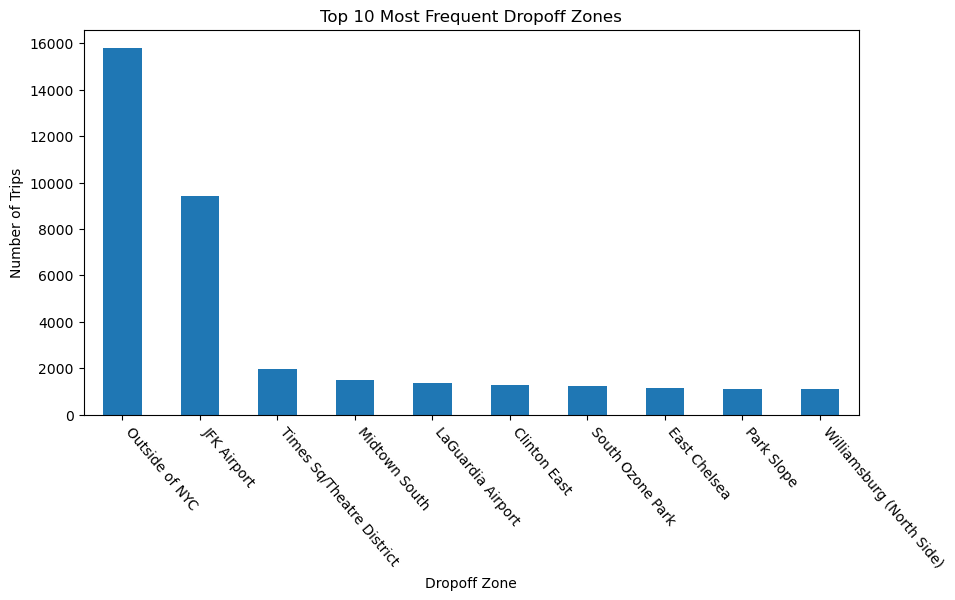

In [33]:
# Plot the top 10 most frequent pickup zones.
full_jfk_locations_df["Dropoff_Zone"].value_counts().head(10).plot(kind="bar", title="Top 10 Most Frequent Dropoff Zones", figsize=(10, 5))
plt.xticks(rotation=310, ha="left")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")

Text(0.5, 0, 'Cost ($)')

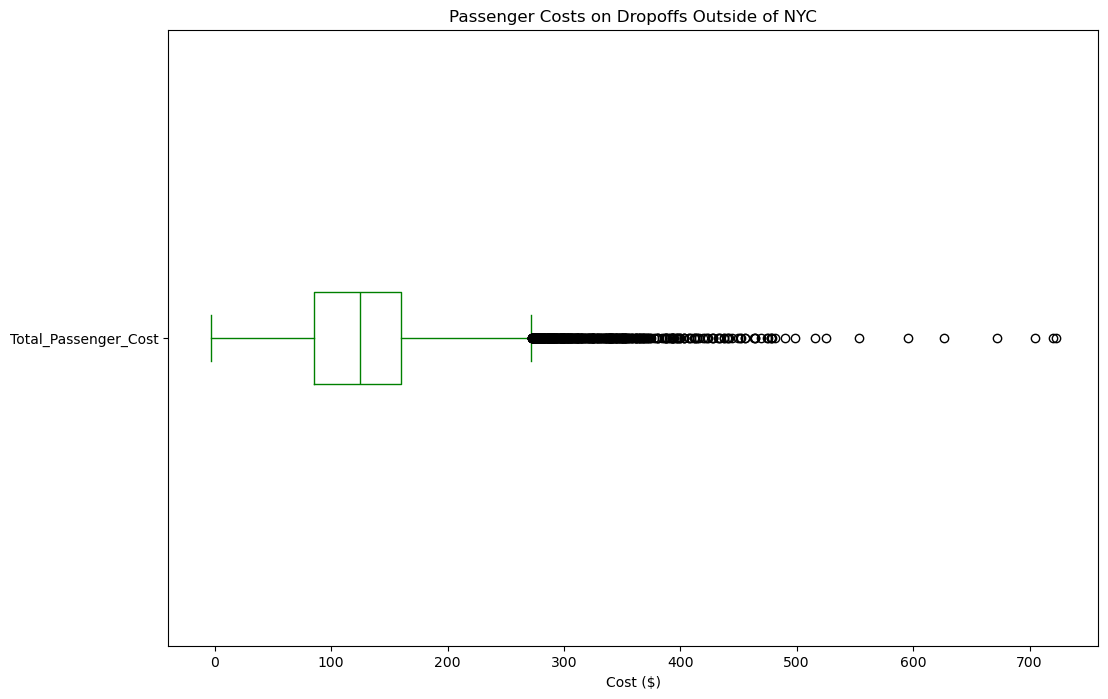

In [34]:
# Boxplot for passenger costs on dropoffs outside of NYC
full_jfk_locations_df[full_jfk_locations_df["Dropoff_Zone"] == "Outside of NYC"]["Total_Passenger_Cost"].plot(kind="box", figsize=(12, 8), color="green",vert=False)   
plt.title("Passenger Costs on Dropoffs Outside of NYC")
plt.ylabel(None)
plt.xlabel("Cost ($)")

In [35]:
borough_dropoff_costs = full_jfk_locations_df.groupby(["Dropoff_Borough", "Dropoff_Zone"])[["Total_Passenger_Cost"]].sum()
borough_dropoff_costs = borough_dropoff_costs.sort_values(by="Total_Passenger_Cost", ascending=False)
borough_dropoff_costs.head(15)

Total_Passenger_Cost
Dropoff_Borough Dropoff_Zone                                        
Manhattan       Times Sq/Theatre District                  207911.14
Queens          JFK Airport                                161537.75
Manhattan       Midtown South                              135066.34
                Clinton East                               124900.49
                East Chelsea                               112034.43
Brooklyn        Park Slope                                  90902.37
Manhattan       Midtown North                               90143.78
                Murray Hill                                 83493.09
                Midtown Center                              80609.77
Brooklyn        Williamsburg (North Side)                   79230.56
Manhattan       East Village                                79136.84
Queens          LaGuardia Airport                           76548.94
Manhattan       Midtown East                                73767.43
Queens          Long Island City/Hunters Point              71351.29
Manhattan       Lower East Side                             71077.55

In [36]:
base_borough_dropoff_costs = full_jfk_locations_df.groupby(["Dropoff_Borough", "Dropoff_Zone"])[["base_passenger_fare"]].sum()
base_borough_dropoff_costs = base_borough_dropoff_costs.sort_values(by="base_passenger_fare", ascending=False)
base_borough_dropoff_costs.head(15)

base_passenger_fare
Dropoff_Borough Dropoff_Zone                                       
Manhattan       Times Sq/Theatre District                 153022.01
Queens          JFK Airport                               119311.56
Manhattan       Midtown South                              97306.62
                Clinton East                               92582.71
                East Chelsea                               81564.96
Brooklyn        Park Slope                                 73488.03
Manhattan       Midtown North                              67776.54
Brooklyn        Williamsburg (North Side)                  65201.91
Manhattan       East Village                               60559.92
                Murray Hill                                60005.84
                Midtown Center                             59600.34
Queens          Long Island City/Hunters Point             58851.73
                LaGuardia Airport                          58319.34
Manhattan       Lower East Side                            55557.21
Brooklyn        Greenpoint                                 54181.23

Text(0, 0.5, 'Average Tip $')

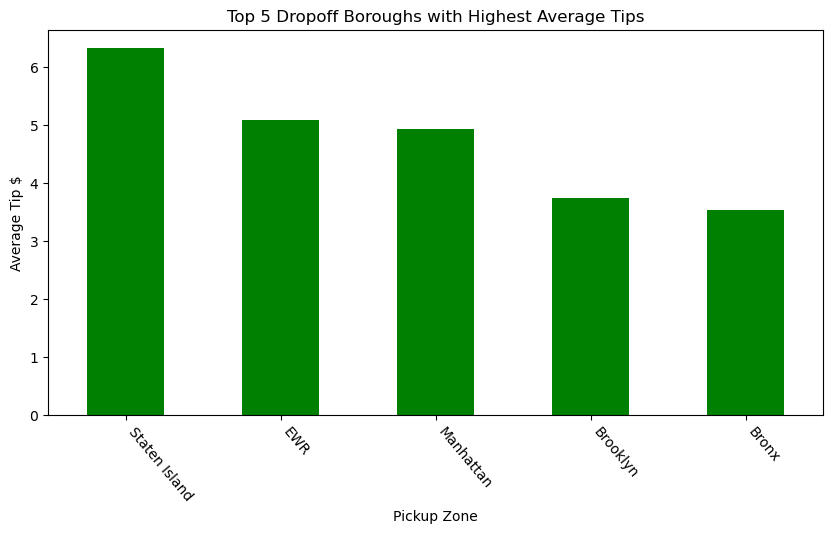

In [37]:
# Plot the top 5 highest average tip pickup borough.
full_jfk_locations_df.groupby(["Dropoff_Borough"])["tips"].mean().sort_values(ascending=False).head(5).plot(kind="bar", title="Top 5 Dropoff Boroughs with Highest Average Tips", figsize=(10, 5), color="green")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Tip $")

Text(0, 0.5, 'Average Driver Pay')

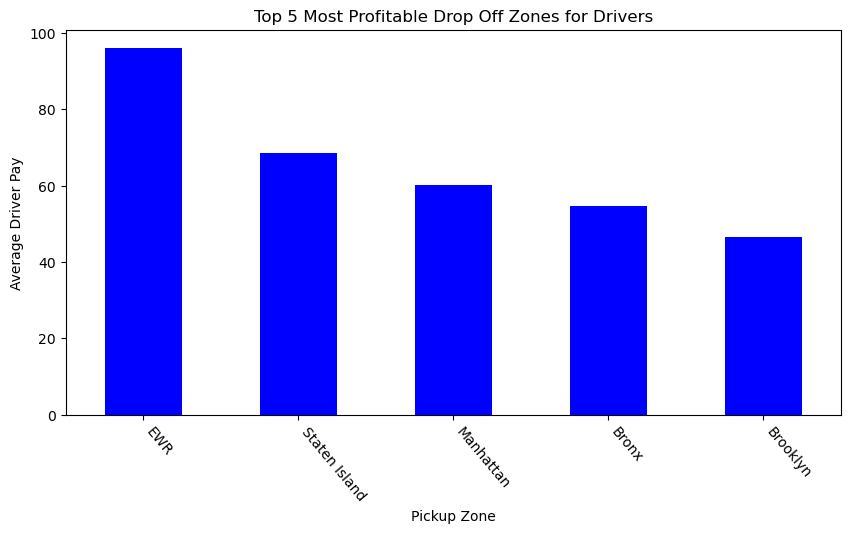

In [38]:
# Plot the top 5 most profitable pickup zones for drivers.
full_jfk_locations_df.groupby(["Dropoff_Borough"])["driver_pay"].mean().sort_values(ascending=False).head(5).plot(kind="bar", title="Top 5 Most Profitable Drop Off Zones for Drivers", figsize=(10, 5), color="blue")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Driver Pay")

In [39]:
# plot the most efficient trips (cost per mile)
full_jfk_locations_df["Cost_Per_Mile"] = full_jfk_locations_df["Total_Passenger_Cost"] / full_jfk_locations_df["trip_miles"]
efficient_lyfts_df = full_jfk_locations_df.loc[full_jfk_locations_df["Cost_Per_Mile"]>0].sort_values(by="Cost_Per_Mile", ascending=True)
efficient_lyfts_df.head(10)

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Borough,Pickup_Zone,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,...,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,Cost_Per_Mile
28630,2023-12-10 23:20:54,2023-12-11 01:18:03,132,Queens,Queens,JFK Airport,JFK Airport,265,NaN,Outside of NYC,...,23.94,6.94,5.60,18.07,2.75,2.5,0.0,155.44,59.80,0.985660
25842,2023-12-10 01:20:40,2023-12-10 01:45:33,132,Queens,Queens,JFK Airport,JFK Airport,138,Queens,LaGuardia Airport,...,14.36,0.00,0.46,1.48,0.00,2.5,0.0,31.90,18.80,1.400894
25971,2023-12-10 06:08:38,2023-12-10 06:50:40,132,Queens,Queens,JFK Airport,JFK Airport,61,Brooklyn,Crown Heights North,...,38.30,0.00,1.06,3.42,0.00,2.5,0.0,61.43,45.28,1.595265
20226,2023-12-08 00:40:05,2023-12-08 01:18:04,132,Queens,Queens,JFK Airport,JFK Airport,4,Manhattan,Alphabet City,...,43.79,0.61,1.29,4.16,2.75,2.5,0.0,75.79,55.10,1.725002
32707,2023-12-12 00:43:55,2023-12-12 01:23:13,132,Queens,Queens,JFK Airport,JFK Airport,112,Brooklyn,Greenpoint,...,37.80,0.00,1.11,3.58,0.00,2.5,0.0,55.94,44.99,1.770563
35486,2023-12-13 04:50:52,2023-12-13 05:20:21,132,Queens,Queens,JFK Airport,JFK Airport,179,Queens,Old Astoria,...,38.63,0.00,1.13,3.65,0.00,2.5,0.0,50.45,45.91,1.801028
92293,2023-12-31 16:42:05,2023-12-31 17:22:38,132,Queens,Queens,JFK Airport,JFK Airport,179,Queens,Old Astoria,...,40.91,0.00,0.00,0.00,0.00,2.5,0.0,54.86,43.41,1.804689
40665,2023-12-14 23:45:14,2023-12-15 00:28:35,132,Queens,Queens,JFK Airport,JFK Airport,256,Brooklyn,Williamsburg (South Side),...,49.40,0.00,1.43,4.61,0.00,2.5,0.0,78.70,57.94,1.817897
77535,2023-12-28 00:16:23,2023-12-28 01:00:12,132,Queens,Queens,JFK Airport,JFK Airport,224,Manhattan,Stuy Town/Peter Cooper Village,...,43.28,4.34,1.38,4.45,2.75,2.5,0.0,67.44,58.70,1.824681
68304,2023-12-25 09:09:43,2023-12-25 09:39:06,132,Queens,Queens,JFK Airport,JFK Airport,181,Brooklyn,Park Slope,...,35.34,0.00,0.98,3.17,0.00,2.5,0.0,55.74,41.99,1.824700


In [40]:
jfk_mean_values = jfk_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].mean()
jfk_mean_values.round(2)

trip_miles                17.30
trip_time               2592.42
base_passenger_fare       60.44
tolls                      3.60
tips                       4.04
driver_pay                49.97
Total_Passenger_Cost      77.90
dtype: float64

In [41]:
jfk_median_values = jfk_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].median()
jfk_median_values.round(2)

trip_miles                17.27
trip_time               2423.00
base_passenger_fare       55.65
tolls                      0.00
tips                       0.00
driver_pay                47.89
Total_Passenger_Cost      71.99
dtype: float64

In [42]:
jfk_mean_values/jfk_median_values

trip_miles              1.001709
trip_time               1.069920
base_passenger_fare     1.086152
tolls                        inf
tips                         inf
driver_pay              1.043495
Total_Passenger_Cost    1.082138
dtype: float64

In [43]:
positive_jfk_df=jfk_df.loc[jfk_df[ 'base_passenger_fare']>=0]

In [44]:
from scipy.stats import norm

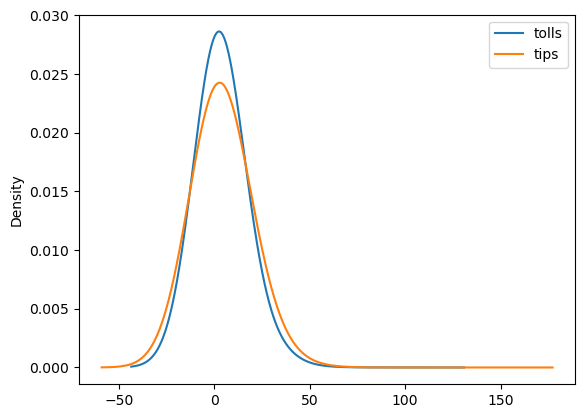

In [45]:
jfk_mean_base_fare=positive_jfk_df[['tolls','tips']]
s =jfk_mean_base_fare.plot.kde(bw_method=2)

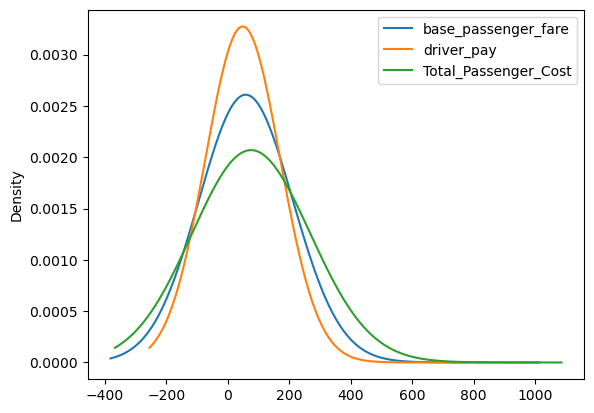

In [46]:
jfk_mean_base_fare2 = jfk_df[['base_passenger_fare','driver_pay','Total_Passenger_Cost']]
s=jfk_mean_base_fare2.plot.kde(bw_method=4)